# 🚕G2M insight for Cab Investment firm

>XYZ is a private firm in US. Due to remarkable growth in the Cab Industry in last few years and multiple key players in the market, it is planning for an investment in Cab industry and as per their Go-to-Market(G2M) strategy they want to understand the market before taking final decision.

# 🎯Aim/Objective 

>The primary objective of this report is to extract meaningful insights from an analysis of two cab companies, with a focus on comprehending their respective usage patterns among customers across the United States. The overarching goal is to furnish XYZ with valuable information that will facilitate informed decision-making regarding strategic investments, thereby paving the way for successful and sustainable growth.

# ⤵️Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sns

import xlrd
import pickle as pkl

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%config Completer.use_jedi = False

# 📂Load Data

The data set provided contains 4 different files - 
> - Cab_data.csv: It contains the information regarding the transactions of 2 cab companies
> - City.csv: It contains information regarding the users of the cab companies in different US cities along with their total population
> - Customer_ID.csv: It contains the customer information such as salary, age and their transsactions.
> - Transaction_ID.csv: It conatins the transactions done by customers and their mode of payments.

In [3]:
os.chdir('..')
currPath = os.getcwd()
currPath = currPath.replace('\\', 
                            '/')
dataPath = currPath + '/Dataset'

> Optional: When you want to load the merged dataset

In [ ]:
final_df = pd.read_csv(dataPath+'/Merged_Data.csv')

> Continue if you want to load all 4 datasets

In [4]:
## Cab data
cab_data = pd.read_csv(dataPath+'/Cab_data.csv', 
                       encoding='utf-8')

## City data
city_data = pd.read_csv(dataPath+'/City.csv', 
                        encoding='utf-8')

## Customer data
cust_data = pd.read_csv(dataPath+'/Customer_ID.csv', 
                        encoding='utf-8')

## Transaction data
trans_data = pd.read_csv(dataPath+'/Transaction_ID.csv', 
                         encoding='utf-8')

In [5]:
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [6]:
city_data.head(5)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
cust_data.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
trans_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


Based on the results of *head()* command, we can see some the columns are common among the provided datasets.
> - **city_data** and **cab_data** datasets have **City** as the common feature.
> - **customer_data** and **transaction_data** datasets have **Customer_ID** as the common feature.
> - **cab_data** and **transaction_data** datasets have **Transaction_ID** as the common features.

Merging the datasets together based on the common features will help us analyse the data based on transaction, city, and income of the customers.

### Merge the data 

As we have multiple datasets with common features in each, we need to merge the datasets together into 1 whole dataset.

In [9]:
sorted(cab_data['City'].value_counts().index)

['ATLANTA GA',
 'AUSTIN TX',
 'BOSTON MA',
 'CHICAGO IL',
 'DALLAS TX',
 'DENVER CO',
 'LOS ANGELES CA',
 'MIAMI FL',
 'NASHVILLE TN',
 'NEW YORK NY',
 'ORANGE COUNTY',
 'PHOENIX AZ',
 'PITTSBURGH PA',
 'SACRAMENTO CA',
 'SAN DIEGO CA',
 'SEATTLE WA',
 'SILICON VALLEY',
 'TUCSON AZ',
 'WASHINGTON DC']

In [10]:
sorted(city_data['City'].value_counts().index)

['ATLANTA GA',
 'AUSTIN TX',
 'BOSTON MA',
 'CHICAGO IL',
 'DALLAS TX',
 'DENVER CO',
 'LOS ANGELES CA',
 'MIAMI FL',
 'NASHVILLE TN',
 'NEW YORK NY',
 'ORANGE COUNTY',
 'PHOENIX AZ',
 'PITTSBURGH PA',
 'SACRAMENTO CA',
 'SAN DIEGO CA',
 'SAN FRANCISCO CA',
 'SEATTLE WA',
 'SILICON VALLEY',
 'TUCSON AZ',
 'WASHINGTON DC']

The *city_data* dataframe contains 1 additional city i.e. **SAN FRANCISCO CA** which is not present in the *cab_data* dataframe. Hence, we will merge these datadrames on *cab_data*.

In [11]:
merge_df1 = pd.merge(cab_data, 
                     city_data, 
                     on='City', 
                     how='left')
merge_df1.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [12]:
cust_data['Customer ID'].value_counts()

29290    1
18668    1
26100    1
24894    1
24403    1
        ..
8632     1
11586    1
11699    1
11065    1
39761    1
Name: Customer ID, Length: 49171, dtype: int64

In [13]:
trans_data['Customer ID'].value_counts()

494      54
2939     53
1070     51
2766     51
1628     50
         ..
34279     1
26182     1
33753     1
34525     1
39761     1
Name: Customer ID, Length: 49171, dtype: int64

Merge the *cust_data* and *trans_data* dataframes on **Customer ID** feature. The merge type will be based on *trans_data* as the **Transaction ID** is important as compare to **Customer ID** and it is also used in the *cab_data* dataframe.

In [14]:
merge_df2 = pd.merge(trans_data, 
                     cust_data, 
                     on='Customer ID', 
                     how='left')
merge_df2.head(5)

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536


In [15]:
merge_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
 7   Population      359392 non-null  object 
 8   Users           359392 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 27.4+ MB


In [16]:
merge_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440098 entries, 0 to 440097
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Transaction ID      440098 non-null  int64 
 1   Customer ID         440098 non-null  int64 
 2   Payment_Mode        440098 non-null  object
 3   Gender              440098 non-null  object
 4   Age                 440098 non-null  int64 
 5   Income (USD/Month)  440098 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 23.5+ MB


In [17]:
merge_df1.isnull().value_counts()

Transaction ID  Date of Travel  Company  City   KM Travelled  Price Charged  Cost of Trip  Population  Users
False           False           False    False  False         False          False         False       False    359392
dtype: int64

Finally we merge *merge_df1* and *merge_df2* dataframes on **Transation ID** feature.

In [18]:
final_df = pd.merge(merge_df1, 
                    merge_df2, 
                    on='Transaction ID', 
                    how='left')
final_df.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536


In [19]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Population          359392 non-null  object 
 8   Users               359392 non-null  object 
 9   Customer ID         359392 non-null  int64  
 10  Payment_Mode        359392 non-null  object 
 11  Gender              359392 non-null  object 
 12  Age                 359392 non-null  int64  
 13  Income (USD/Month)  359392 non-null  int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 41.1+ MB


*Users* and *Population* columns have **Object** as their data type. We change it to **int**.

In [20]:
final_df['Users'] = final_df['Users'].str.replace(',', 
                                                  '').astype(np.int64)
final_df['Population'] = final_df['Population'].str.replace(',', 
                                                            '').astype(np.int64)

Values in the *Date of Travel* column are serial number which need to be changed to date format.

In [21]:
final_df['Date of Travel'] = final_df['Date of Travel'].apply(lambda x: xlrd.xldate_as_datetime(x, 
                                                                                                0).date())
final_df['Date of Travel'] = pd.to_datetime(final_df['Date of Travel'])

In [22]:
final_df['Year of Travel'] = final_df['Date of Travel'].apply(lambda x: x.year)

In [23]:
final_df = final_df.rename(columns={ 
    'Transaction ID' : 'transaction_id',
    'Date of Travel' : 'travel_date',
    'Year of Travel' : 'travel_year',
    'Customer ID' : 'customer_id',
    'Age' : 'age',
    'Gender' : 'gender',
    'City' : 'city',
    'Population' : 'population',
    'Users' : 'users',
    'Income (USD/Month)' : 'monthly_income(USD)',
    'KM Travelled' : 'travel_dist(km)',
    'Price Charged' : 'total_chrgd',
    'Cost of Trip' : 'trip_cost',
    'Payment_Mode' : 'pymnt_mode',
    'Company' : 'cab_cmpny'
})

final_df['trip_profit'] = final_df['total_chrgd'] - final_df['trip_cost']

final_df = final_df[['transaction_id', 'travel_date', 'travel_year', 'customer_id', 'age', \
                     'gender', 'city', 'population', 'users', 'monthly_income(USD)', 'travel_dist(km)', \
                     'trip_cost', 'total_chrgd', 'trip_profit', 'pymnt_mode', 'cab_cmpny']]

final_df.head()

,transaction_id,travel_date,travel_year,customer_id,age,gender,city,population,users,monthly_income(USD),travel_dist(km),trip_cost,total_chrgd,trip_profit,pymnt_mode,cab_cmpny
0,10000011,2016-01-08,2016,29290,28,Male,ATLANTA GA,814885,24701,10813,30.45,313.635,370.95,57.315,Card,Pink Cab
1,10000012,2016-01-06,2016,27703,27,Male,ATLANTA GA,814885,24701,9237,28.62,334.854,358.52,23.666,Card,Pink Cab
2,10000013,2016-01-02,2016,28712,53,Male,ATLANTA GA,814885,24701,11242,9.04,97.632,125.20,27.568,Cash,Pink Cab
3,10000014,2016-01-07,2016,28020,23,Male,ATLANTA GA,814885,24701,23327,33.17,351.602,377.40,25.798,Cash,Pink Cab
4,10000015,2016-01-03,2016,27182,33,Male,ATLANTA GA,814885,24701,8536,8.73,97.776,114.62,16.844,Card,Pink Cab


### Save Merged data 

In [24]:
final_df.to_csv(dataPath+'/Merged_Data.csv', index=False)

# 🔍Exploratory Data Analysis(EDA) 

>Goal is to explore and analyse the data by visualisation.

In [25]:
## Pink cab, Yellow cab
palette = ['#FF4B91', '#FFCD4B']

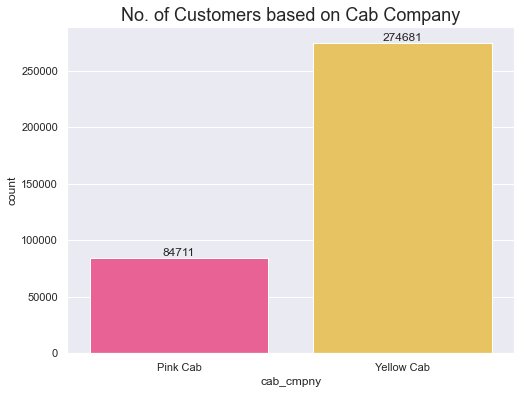

In [26]:
sns.set(rc = {'figure.figsize':(8,6)})
ax = sns.countplot(x='cab_cmpny', 
                   data=final_df, 
                   palette=palette)
ax.set_title('No. of Customers based on Cab Company', 
             fontsize=18)
for label in ax.containers:
    ax.bar_label(label)

There are 2 major cab companies - **Pink** and **Yellow** cab. As per the records, the total number of the **Yellow** cabs accessed by customers is greater than the other.

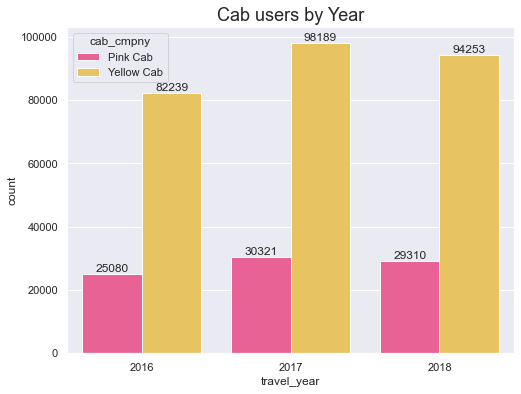

In [27]:
sns.set(rc = {'figure.figsize':(8,6)})
ax = sns.countplot(x='travel_year', 
                   data=final_df, 
                   hue='cab_cmpny', 
                   palette=palette)
ax.set_title('Cab users by Year', 
             fontsize=18)
for label in ax.containers:
    ax.bar_label(label)

In [29]:
final_df.head()

,transaction_id,travel_date,travel_year,customer_id,age,gender,city,population,users,monthly_income(USD),travel_dist(km),trip_cost,total_chrgd,trip_profit,pymnt_mode,cab_cmpny
0,10000011,2016-01-08,2016,29290,28,Male,ATLANTA GA,814885,24701,10813,30.45,313.635,370.95,57.315,Card,Pink Cab
1,10000012,2016-01-06,2016,27703,27,Male,ATLANTA GA,814885,24701,9237,28.62,334.854,358.52,23.666,Card,Pink Cab
2,10000013,2016-01-02,2016,28712,53,Male,ATLANTA GA,814885,24701,11242,9.04,97.632,125.20,27.568,Cash,Pink Cab
3,10000014,2016-01-07,2016,28020,23,Male,ATLANTA GA,814885,24701,23327,33.17,351.602,377.40,25.798,Cash,Pink Cab
4,10000015,2016-01-03,2016,27182,33,Male,ATLANTA GA,814885,24701,8536,8.73,97.776,114.62,16.844,Card,Pink Cab


## Distribution by City

Text(0.5, 1.0, 'Distribution by City')

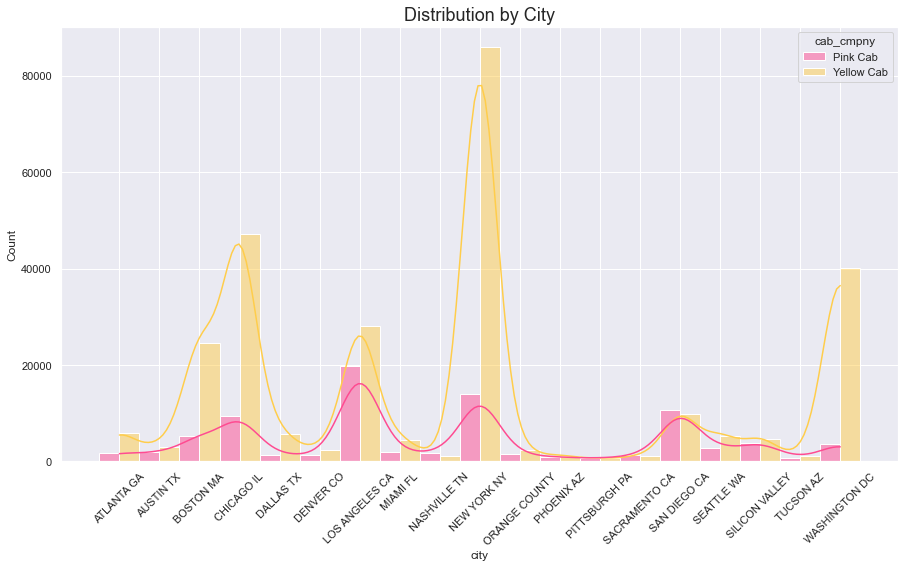

In [30]:
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.histplot(x='city', 
                  hue='cab_cmpny',
                  stat='count',
                  data=final_df,
                  palette=palette,
                  multiple='dodge',
                  kde=True)
plt.xticks(rotation=45)
ax.set_title('Distribution by City', 
             fontsize=18)

## Distribution  by KM travelled 

Text(0.5, 1.0, 'Distribution by Distance travelled (in KM)')

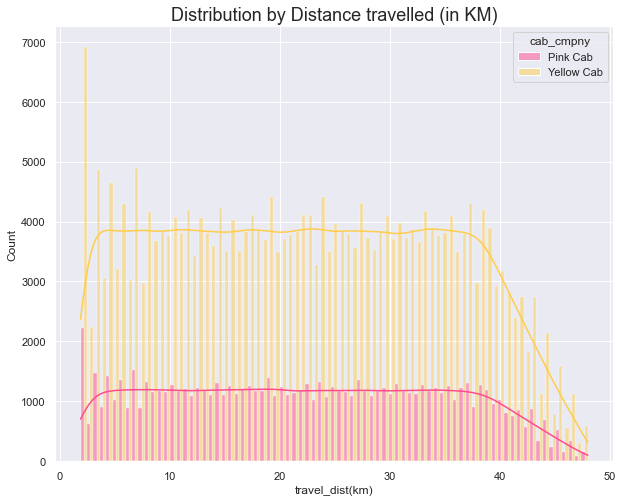

In [31]:
sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.histplot(x='travel_dist(km)', 
                  hue='cab_cmpny',
                  stat='count',
                  data=final_df,
                  palette=palette,
                  multiple='dodge',
                  kde=True)
ax.set_title('Distribution by Distance travelled (in KM)', 
             fontsize=18)

## Distribution by Price charged 

Text(0.5, 1.0, 'Distribution by Price charged')

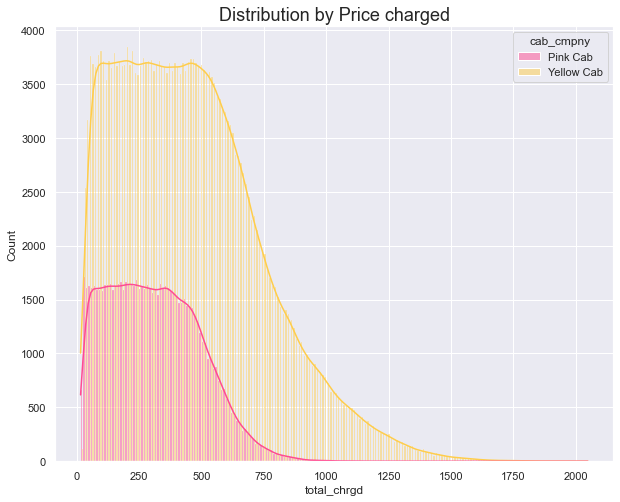

In [32]:
sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.histplot(x='total_chrgd', 
                  hue='cab_cmpny',
                  stat='count',
                  data=final_df,
                  palette=palette,
                  multiple='dodge',
                  kde=True)
ax.set_title('Distribution by Price charged', 
             fontsize=18)

## Distribution by Payment mode

(0.0, 200000.0)

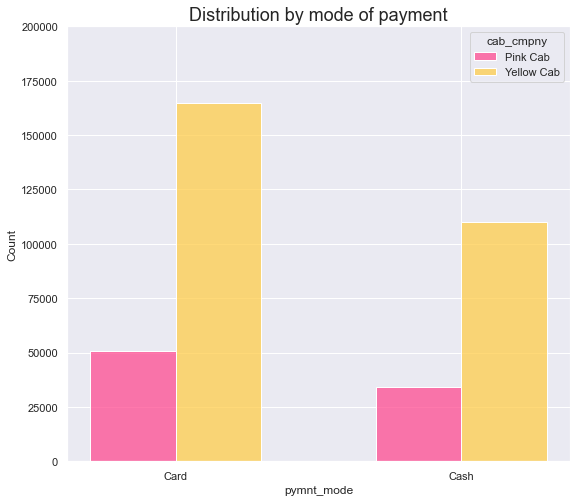

In [33]:
sns.set(rc = {'figure.figsize':(9,8)})
ax = sns.histplot(x='pymnt_mode', 
                  hue='cab_cmpny',
                  stat='count',
                  data=final_df,
                  palette=palette,
                  multiple='dodge',
                  shrink=0.6)
ax.set_title('Distribution by mode of payment', 
             fontsize=18)
plt.ylim(0, 200000)

## Distribution by Gender 

(0.0, 200000.0)

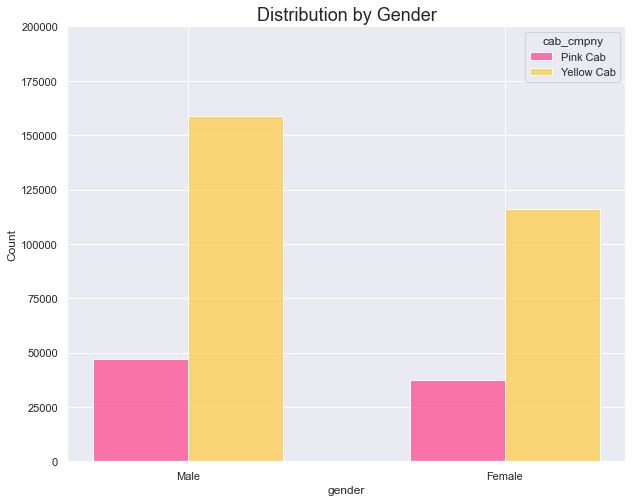

In [34]:
sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.histplot(x='gender', 
                  hue='cab_cmpny',
                  stat='count',
                  data=final_df,
                  palette=palette,
                  multiple='dodge', 
                  shrink=0.6)
ax.set_title('Distribution by Gender', 
             fontsize=18)
plt.ylim(0, 200000)

## Distribution by Age 

Text(0.5, 1.0, 'Distribution by Age')

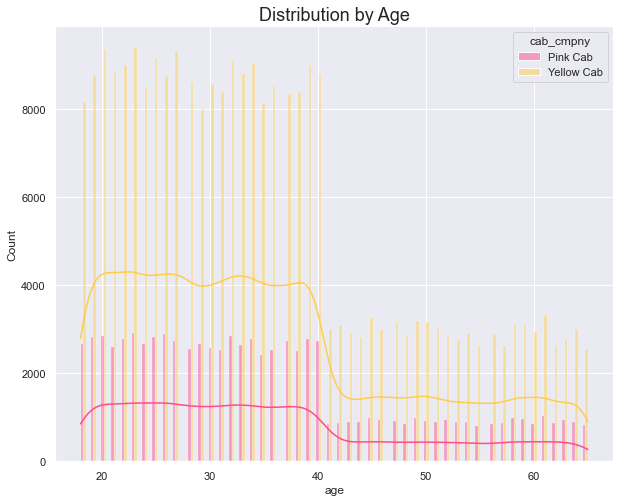

In [35]:
sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.histplot(x='age', 
                  hue='cab_cmpny',
                  data=final_df,
                  palette=palette,
                  multiple='dodge',
                  kde=True)
ax.set_title('Distribution by Age', 
             fontsize=18)


## Distribution by Income 

Text(0.5, 1.0, 'Distribution by Monthly Income')

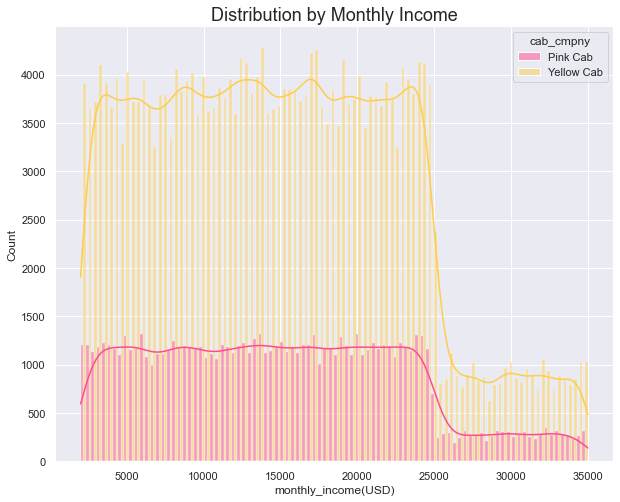

In [36]:
sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.histplot(x='monthly_income(USD)', 
                  hue='cab_cmpny',
                  stat='count',
                  data=final_df,
                  palette=palette,
                  multiple='dodge',
                  kde=True)
ax.set_title('Distribution by Monthly Income', 
             fontsize=18)

## Distribution by Profit 

Text(0.5, 1.0, 'Distribution by Profit made')

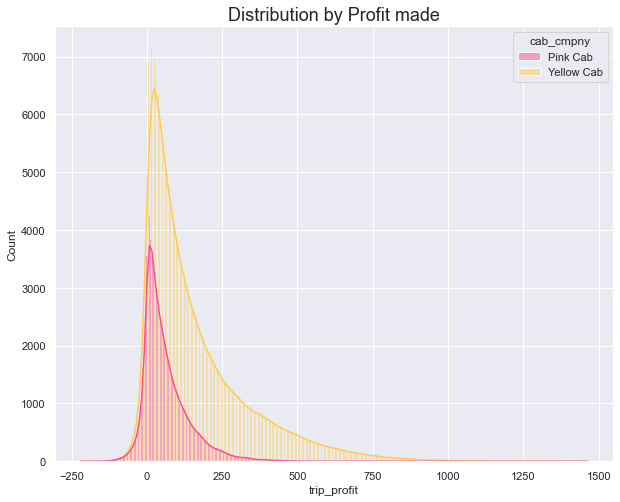

In [38]:
sns.set(rc = {'figure.figsize':(10,8)})
ax = sns.histplot(x='trip_profit', 
                  hue='cab_cmpny',
                  stat='count',
                  data=final_df,
                  palette=palette,
                  multiple='dodge',
                  kde=True)
ax.set_title('Distribution by Profit made', 
             fontsize=18)